In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


# Load Images

In [2]:
import pathlib
train_dir = pathlib.Path("data/train/")
test_dir = pathlib.Path("data/test/")

In [3]:
train_image_count = len(list(train_dir.glob('*/*.jpg')))
print(train_image_count)

100000


In [4]:
batch_size = 128
img_height = 32
img_width = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['FAKE', 'REAL']


# Visualize the Data

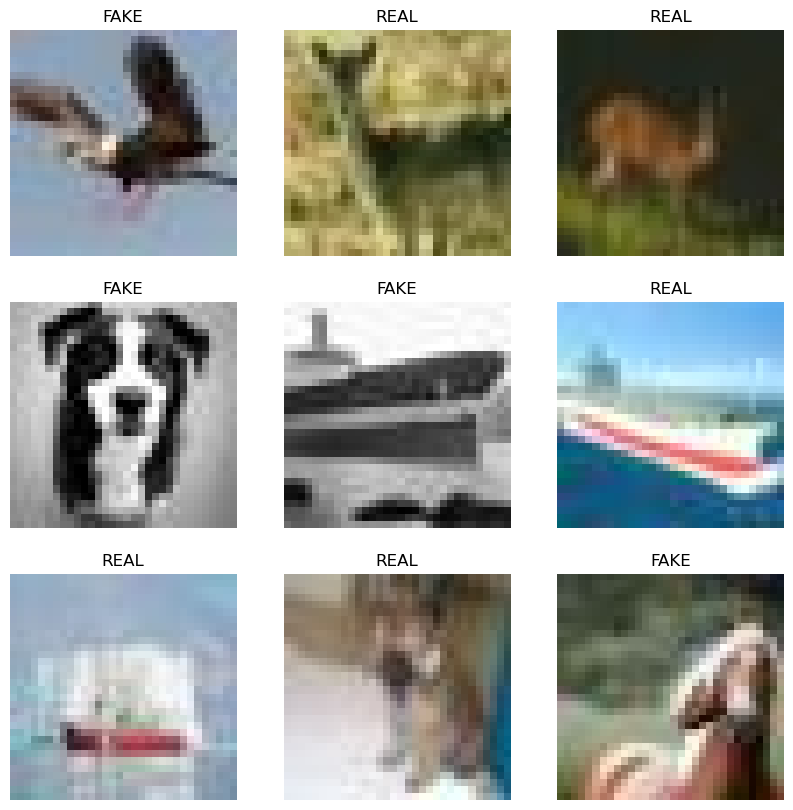

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for performance

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Callback

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Define the callbacks
callbacks = [
    ModelCheckpoint(filepath='model-tf/best_model.h5', save_best_only=True),
    EarlyStopping(patience=3),
    TensorBoard(log_dir='model-tf/logs')
]

# Train a Model

In [13]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50,
    callbacks = callbacks
)

Epoch 1/50
625/625 [==============================] - 29s 37ms/step - loss: 0.4444 - accuracy: 0.7878 - val_loss: 0.3492 - val_accuracy: 0.8457
Epoch 2/50
625/625 [==============================] - 6s 9ms/step - loss: 0.3261 - accuracy: 0.8605 - val_loss: 0.3263 - val_accuracy: 0.8597
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2890 - accuracy: 0.8791 - val_loss: 0.2874 - val_accuracy: 0.8796
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2687 - accuracy: 0.8894 - val_loss: 0.2542 - val_accuracy: 0.8960
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2526 - accuracy: 0.8965 - val_loss: 0.2433 - val_accuracy: 0.9011
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2407 - accuracy: 0.9019 - val_loss: 0.2391 - val_accuracy: 0.9021
Epoch 7/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2312 - accuracy: 0.9061 - val_loss: 0.2343 - val_accuracy: 0.9036
Epo

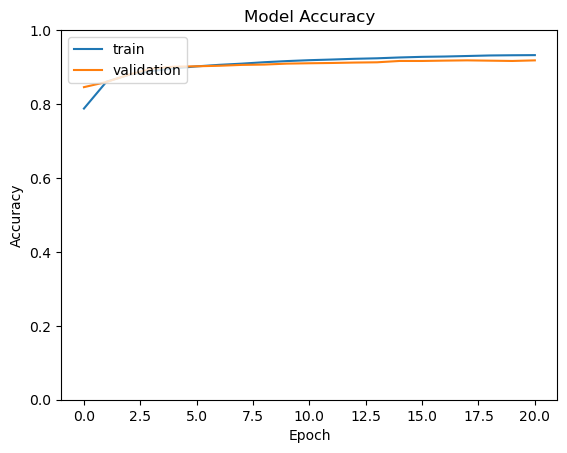

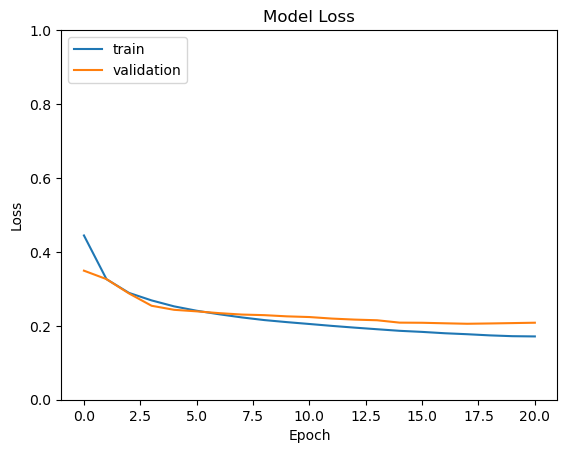

In [15]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylim((0, 1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylim((0, 1))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()